# Result for normal case

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from dataset import *
import math

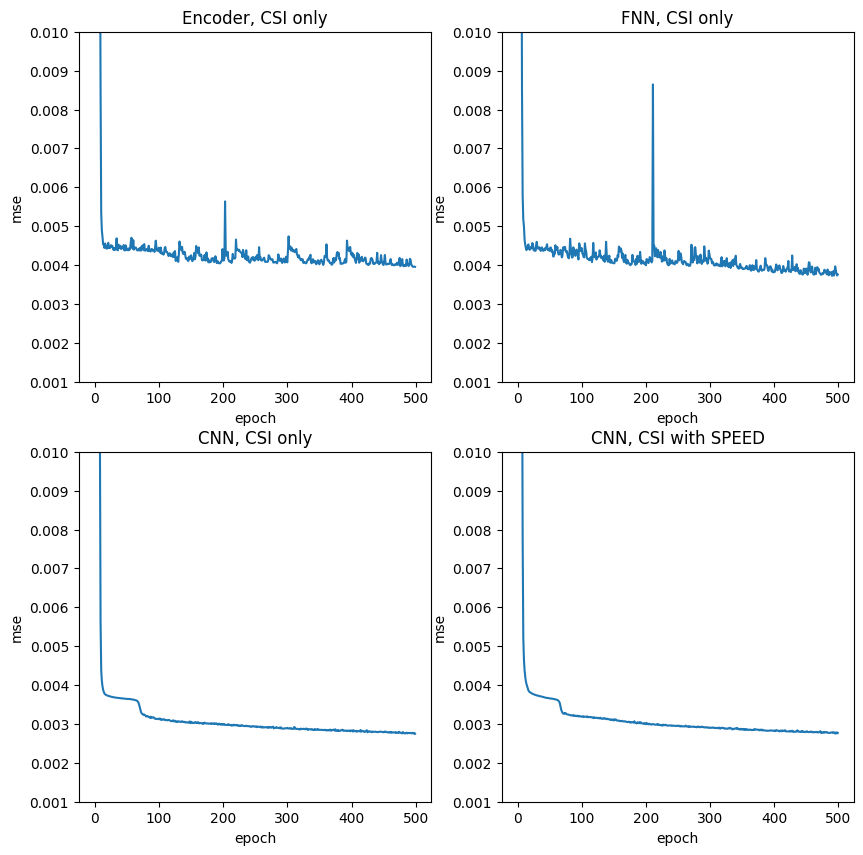

In [67]:
plt.figure(figsize=(10, 10))

losses = np.load('encoder/losses.npy')
plt.subplot(2,2,1)
plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('Encoder, CSI only')
plt.ylabel('mse')
plt.xlabel('epoch')

losses = np.load('fnn/losses.npy')
plt.subplot(2,2,2)
plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('FNN, CSI only')
plt.ylabel('mse')
plt.xlabel('epoch')

losses = np.load('cnn_basic/losses.npy')
plt.subplot(2,2,3)
plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('CNN, CSI only')
plt.ylabel('mse')
plt.xlabel('epoch')

losses = np.load('cnn_speed/losses.npy')
plt.subplot(2,2,4)
plt.ylim(0.001,0.01)
plt.plot(losses[0],losses[1])
plt.title('CNN, CSI with SPEED')
plt.ylabel('mse')
plt.xlabel('epoch')

# losses = np.load('cnn_speed_label/losses.npy')
# plt.subplot(1,3,3)
# plt.ylim(0.001,0.01)
# plt.plot(losses[0],losses[1])
# plt.title('CNN, CSI + RSSI + SPEED')
# plt.ylabel('mse')
# plt.xlabel('epoch')

plt.show()

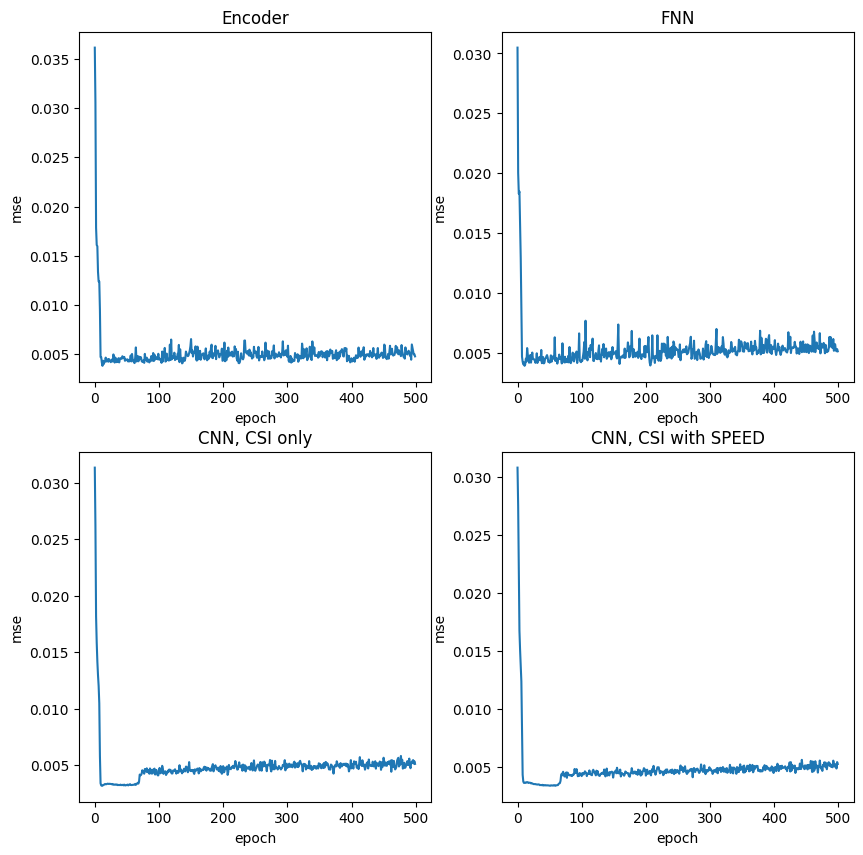

In [68]:
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
losses = np.load('encoder/val_losses.npy')
plt.plot(losses[0],losses[1])
plt.title('Encoder')
plt.ylabel('mse')
plt.xlabel('epoch')
# plt.ylim(0.001,0.01)

plt.subplot(2,2,2)
losses = np.load('fnn/val_losses.npy')
plt.plot(losses[0],losses[1])
plt.title('FNN')
plt.ylabel('mse')
plt.xlabel('epoch')
# plt.ylim(0.001,0.01)

plt.subplot(2,2,3)
losses = np.load('cnn_basic/val_losses.npy')
plt.plot(losses[0],losses[1])
plt.title('CNN, CSI only')
plt.ylabel('mse')
plt.xlabel('epoch')
# plt.ylim(0.001,0.01)

plt.subplot(2,2,4)
losses = np.load('cnn_speed/val_losses.npy')
plt.plot(losses[0],losses[1])
plt.title('CNN, CSI with SPEED')
plt.ylabel('mse')
plt.xlabel('epoch')
# plt.ylim(0.001,0.01)

plt.show()

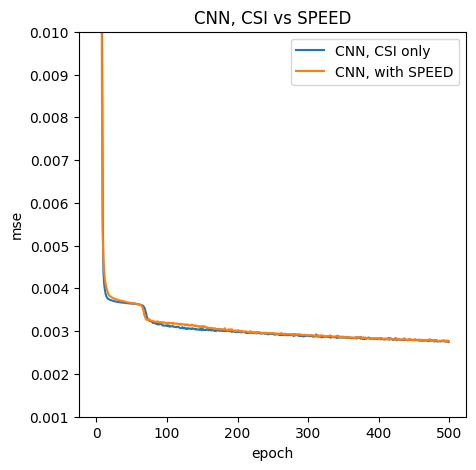

In [69]:
cnn_loss = np.load('cnn_basic/losses.npy')
cnn_speed_loss = np.load('cnn_speed/losses.npy')
cnn_speed_label_loss = np.load('cnn_speed_label/losses.npy')

plt.figure(figsize=(5,5))

plt.plot(cnn_loss[0],cnn_loss[1],label='CNN, CSI only')
plt.plot(cnn_speed_loss[0],cnn_speed_loss[1],label='CNN, with SPEED')
# plt.plot(cnn_speed_label_loss[0],cnn_speed_label_loss[1],label='CNN, using SPEED as label')
plt.legend()
plt.ylim(0.001,0.01)
plt.title('CNN, CSI vs SPEED')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.show()

52


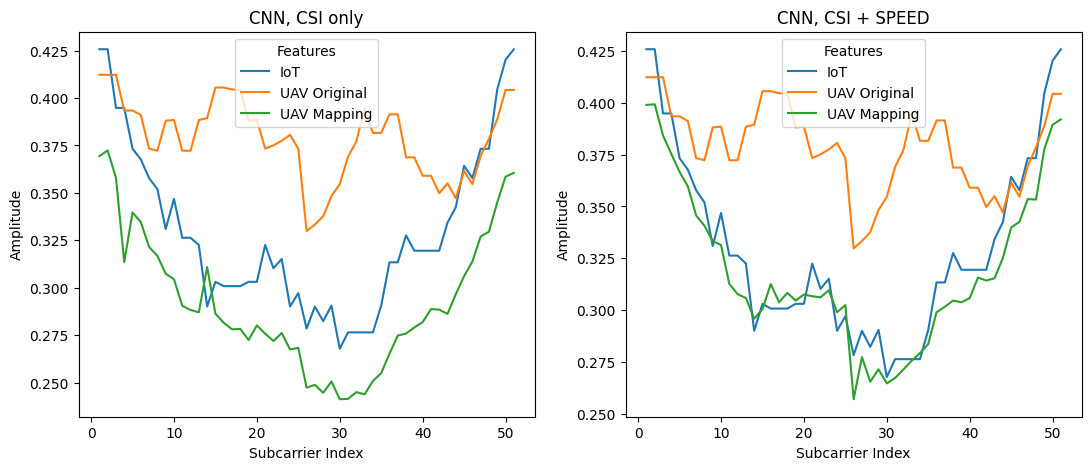

In [71]:
testset = np.load("test_set_4/normalized_speed_testing_set.npy")
# testset = np.load("test_set_4/standardized_speed_testing_set.npy")

plot_index = 777
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
model = torch.load('cnn_basic/model_final.pth')
model.to("cpu")
model.eval()
d_s = csi_cnn_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
index = torch.from_numpy(np.array([i+1 for i in range(51)]))
uav_original = data[0][0]
uav_modify = model(data).detach().numpy()
plt.plot(index,iot_original,label = "IoT")
plt.plot(index,uav_original,label = "UAV Original")
plt.plot(index,uav_modify,label = "UAV Mapping")
plt.legend(title = "Features",loc='upper center')
plt.ylabel('Amplitude')
plt.xlabel('Subcarrier Index')
plt.title('CNN, CSI only')

plt.subplot(1,3,2)
model = torch.load('cnn_speed/model_final.pth')
model.to("cpu")
model.eval()
d_s = csi_cnn_speed_dataset(testset)
data, iot_original = d_s.__getitem__(plot_index)
index = torch.from_numpy(np.array([i+1 for i in range(51)]))
uav_original = data[0][0][:51]
print(len(data[0][0]))
uav_modify = model(torch.unsqueeze(data,0)).detach().numpy()
plt.plot(index,iot_original,label = "IoT")
plt.plot(index,uav_original,label = "UAV Original")
plt.plot(index,uav_modify,label = "UAV Mapping")
plt.legend(title = "Features",loc='upper center')
plt.ylabel('Amplitude')
plt.xlabel('Subcarrier Index')
plt.title('CNN, CSI + SPEED')


# test_label = np.load("test_set_4/normalized_speed_label_testing_set.npy")

# plt.subplot(1,3,3)
# model = torch.load('cnn_speed_label/model_final.pth')
# model.to("cpu")
# model.eval()
# d_s = csi_cnn_speed_dataset(testset)
# data, iot_original = d_s.__getitem__(plot_index)
# index = torch.from_numpy(np.array([i+1 for i in range(51)]))
# uav_original = data[0][0][:51]
# uav_modify = model(torch.unsqueeze(data,0)).detach().numpy()
# plt.plot(index,iot_original,label = "IoT")
# plt.plot(index,uav_original,label = "UAV Original")
# plt.plot(index,uav_modify,label = "UAV Mapping")
# plt.legend(title = "Features",loc='upper center')
# plt.ylabel('Amplitude')
# plt.xlabel('Subcarrier Index')
# plt.title('CNN, CSI + SPEED using SPEED as label')

plt.show()

# Evaluate the KDR of each model

In [72]:
import training_core
import eval
import greycode_quantization as quan

In [73]:
trainset = np.load("test_set_4/normalized_speed_training_set.npy")
testset = np.load("test_set_4/normalized_speed_testing_set.npy")
valiset = np.load("test_set_4/normalized_speed_validation_set.npy")
train_label_set = np.load("test_set_4/normalized_speed_label_training_set.npy")
test_label_set = np.load("test_set_4/normalized_speed_label_testing_set.npy")
# hoverset = np.load("test_set_4/normalized_speed_hover_set.npy")
# slowset = np.load("test_set_4/normalized_speed_slow_set.npy")
# fastset = np.load("test_set_4/normalized_speed_fast_set.npy")

train_csi_loader = DataLoader(csi_cnn_dataset(trainset), batch_size=1)
test_csi_loader = DataLoader(csi_cnn_dataset(testset), batch_size=1)
# test_csi_hover_loader = DataLoader(csi_cnn_dataset(hoverset), batch_size=1)
# test_csi_slow_loader = DataLoader(csi_cnn_dataset(slowset), batch_size=1)
# test_csi_fast_loader = DataLoader(csi_cnn_dataset(fastset), batch_size=1)

train_csi_speed_loader = DataLoader(csi_cnn_speed_dataset(trainset), batch_size=1)
test_csi_speed_loader = DataLoader(csi_cnn_speed_dataset(testset), batch_size=1)
# test_csi_speed_hover_loader = DataLoader(csi_cnn_speed_dataset(hoverset), batch_size=1)
# test_csi_speed_slow_loader = DataLoader(csi_cnn_speed_dataset(slowset), batch_size=1)
# test_csi_speed_fast_loader = DataLoader(csi_cnn_speed_dataset(fastset), batch_size=1)

train_csi_speed_label_loader = DataLoader(csi_cnn_speed_dataset(train_label_set), batch_size=1)
test_csi_speed_label_loader = DataLoader(csi_cnn_speed_dataset(test_label_set), batch_size=1)

test_fnn_loader = DataLoader(csi_dataset(testset), batch_size=1)
test_encoder_loader = DataLoader(csi_dataset(testset), batch_size=1)

cnn_basic_model = torch.load('cnn_basic/model_final.pth')
cnn_speed_model = torch.load('cnn_speed/model_final.pth')
cnn_speed_label_model = torch.load('cnn_speed_label/model_final.pth')
fnn_model = torch.load('fnn/model_final.pth')
encoder_model = torch.load('encoder/model_final.pth')

In [139]:
raw_kdr, cnn_kdr = eval.KDR(cnn_basic_model, test_csi_loader, 2, 13)
# _, cnn_train_kdr = eval.KDR(cnn_basic_model, train_csi_loader, 2, 13)
# raw_hover_kdr, cnn_hover_kdr = eval.KDR(cnn_basic_model, test_csi_hover_loader, 2, 13)
# raw_slow_kdr, cnn_slow_kdr = eval.KDR(cnn_basic_model, test_csi_slow_loader, 2, 13)
# raw_fast_kdr, cnn_fast_kdr = eval.KDR(cnn_basic_model, test_csi_fast_loader, 2, 13)

# _, cnn_train_speed_kdr = eval.KDR(cnn_speed_model, train_csi_speed_loader, 2, 13)
_, cnn_speed_kdr = eval.KDR(cnn_speed_model, test_csi_speed_loader, 2, 13)
# _, cnn_speed_hover_kdr = eval.KDR(cnn_speed_model, test_csi_speed_hover_loader, 2, 13)
# _, cnn_speed_slow_kdr = eval.KDR(cnn_speed_model, test_csi_speed_slow_loader, 2, 13)
# _, cnn_speed_fast_kdr = eval.KDR(cnn_speed_model, test_csi_speed_fast_loader, 2, 13)

# _, cnn_train_speed_label_kdr = eval.KDR(cnn_speed_label_model, train_csi_speed_label_loader, 2, 13)
_, cnn_speed_label_kdr = eval.KDR(cnn_speed_label_model, test_csi_speed_label_loader, 2, 13)

_, fnn_kdr = eval.KDR(fnn_model, test_fnn_loader, 2, 13)
_, encoder_kdr = eval.KDR(encoder_model, test_encoder_loader, 2, 13)


In [140]:
print("RAW KDR: ", raw_kdr)
print("CNN Basic KDR: ", cnn_kdr)
# print("CNN hover KDR: ", cnn_hover_kdr)
# print("CNN slow KDR: ", cnn_slow_kdr)
# print("CNN fast KDR: ", cnn_fast_kdr)
print("CNN Speed KDR: ", cnn_speed_kdr)
# print("CNN Speed hover KDR: ", cnn_speed_hover_kdr)
# print("CNN Speed slow KDR: ", cnn_speed_slow_kdr)
# print("CNN Speed fast KDR: ", cnn_speed_fast_kdr)
print("CNN Speed Label KDR: ", cnn_speed_label_kdr)
# print("CNN Train KDR: ", cnn_train_kdr)
# print("CNN Train Speed KDR: ", cnn_train_speed_kdr)
# print("CNN Train Speed Label KDR: ", cnn_train_speed_label_kdr)
print("FNN KDR: ", fnn_kdr)
print("Encoder KDR: ", encoder_kdr)

RAW KDR:  0.5321459600347523
CNN Basic KDR:  0.18001396909763123
CNN Speed KDR:  0.1894005212858391
CNN Speed Label KDR:  0.20948329017141504
FNN KDR:  0.4242578976034861
Encoder KDR:  0.41891339869281186


In [74]:
# classfiy the speed in testset

# hover_speed < 0.15
hover_set = [[], []]
hover_label = [[], []]
hover_index = []

# slow_speed < 3
slow_set = [[], []]
slow_label = [[], []]
slow_index = []

# fast_speed >= 3
fast_set = [[], []]
fast_label = [[], []]
fast_index = []

for i in range(len(testset[0])-1):
    vel = -(testset[0][i][52] * 7.118609414766342 - 7.118609414766342)
    if vel < 0.15:
        hover_index.append(i)
        hover_set[0].append(testset[0][i])
        hover_set[1].append(testset[1][i])
        hover_label[0].append(test_label_set[0][i])
        hover_label[1].append(test_label_set[1][i])
    elif vel < 3:
        slow_index.append(i)
        slow_set[0].append(testset[0][i])
        slow_set[1].append(testset[1][i])
        slow_label[0].append(test_label_set[0][i])
        slow_label[1].append(test_label_set[1][i])
    else:
        fast_index.append(i)
        fast_set[0].append(testset[0][i])
        fast_set[1].append(testset[1][i])
        fast_label[0].append(test_label_set[0][i])
        fast_label[1].append(test_label_set[1][i])

# for i in range(len(trainset[0])-1):
#     vel = -(trainset[0][i][52] * 7.118609414766342 - 7.118609414766342)
#     if vel < 0.15:
#         hover_index.append(i)
#         hover_set[0].append(trainset[0][i])
#         hover_set[1].append(trainset[1][i])
#         hover_label[0].append(train_label_set[0][i])
#         hover_label[1].append(train_label_set[1][i])
#     elif vel < 3:
#         slow_index.append(i)
#         slow_set[0].append(trainset[0][i])
#         slow_set[1].append(trainset[1][i])
#         slow_label[0].append(train_label_set[0][i])
#         slow_label[1].append(train_label_set[1][i])
#     else:
#         fast_index.append(i)
#         fast_set[0].append(trainset[0][i])
#         fast_set[1].append(trainset[1][i])
#         fast_label[0].append(train_label_set[0][i])
#         fast_label[1].append(train_label_set[1][i])

# for i in range(len(valiset[0])-1):
#     vel = -(valiset[0][i][52] * 7.118609414766342 - 7.118609414766342)
#     if vel < 0.15:
#         hover_index.append(i)
#         hover_set[0].append(valiset[0][i])
#         hover_set[1].append(valiset[1][i])
#         hover_label[0].append(test_label_set[0][i])
#         hover_label[1].append(test_label_set[1][i])
#     elif vel < 3:
#         slow_index.append(i)
#         slow_set[0].append(valiset[0][i])
#         slow_set[1].append(valiset[1][i])
#         slow_label[0].append(test_label_set[0][i])
#         slow_label[1].append(test_label_set[1][i])
#     else:
#         fast_index.append(i)
#         fast_set[0].append(valiset[0][i])
#         fast_set[1].append(valiset[1][i])
#         fast_label[0].append(test_label_set[0][i])
#         fast_label[1].append(test_label_set[1][i])

hover_set = np.array(hover_set)
slow_set = np.array(slow_set)
fast_set = np.array(fast_set)
hover_label = np.array(hover_label)
slow_label = np.array(slow_label)
fast_label = np.array(fast_label)
moving_set = np.concatenate((slow_set, fast_set), axis=1)
moving_label = np.concatenate((slow_label, fast_label), axis=1)
moving_index = slow_index + fast_index

In [75]:
print(len(hover_index), len(slow_index), len(fast_index))


714 370 67


In [76]:
cnn_speed_model.to("cpu")
cnn_speed_model.eval()

total_index = [hover_index, slow_index, fast_index, moving_index]
raw_kdr_list = []
cnn_speed_kdr_list = []

for s in total_index:
    kdr = 0
    kdr_original = 0
    for i in range(len(s)):
        data, iot_original = csi_cnn_speed_dataset(testset).__getitem__(s[i])
        uav_original = data[0][0][:51]
        uav_modify = cnn_speed_model(torch.unsqueeze(data, 0)).detach().numpy()
        uav_key_original = quan.quantization_1(uav_original, 2, 13, 0)
        uav_key = quan.quantization_1(uav_modify, 2, 13, 0)
        iot_key = quan.quantization_1(iot_original, 2, 13, 0)
        kdr_original += eval.kdr(uav_key_original, iot_key)
        kdr += eval.kdr(uav_key, iot_key)
    print("RAW:", kdr_original/len(s))
    raw_kdr_list.append(kdr_original/len(s))
    print(kdr/len(s))
    cnn_speed_kdr_list.append(kdr/len(s))


RAW: 0.4174767946394247
0.1795188663700783
RAW: 0.45214626391096985
0.1703232644409118
RAW: 0.47175885279484936
0.16710564822944096
RAW: 0.4551532283393904
0.16982994570826088


In [77]:
cnn_basic_model.to("cpu")
cnn_basic_model.eval()
cnn_kdr_list = []

for s in total_index:
    kdr = 0
    for i in range(len(s)):
        data, iot_original = csi_cnn_dataset(testset).__getitem__(s[i])
        uav_original = data[0][0]
        uav_modify = cnn_basic_model(data).detach().numpy()
        uav_key = quan.quantization_1(uav_modify, 2, 13, 0)
        iot_key = quan.quantization_1(iot_original, 2, 13, 0)
        kdr += eval.kdr(uav_key, iot_key)
    cnn_kdr_list.append(kdr/len(s))
    print(kdr/len(s))


0.17553688141923496
0.1674085850556441
0.1624231782265144
0.1666442320635352


In [83]:
# cnn_speed_label_model.to("cpu")
# cnn_speed_label_model.eval()

# cnn_speed_label_kdr_list = []

# for s in total_index:
#     kdr = 0
#     for i in range(len(s)):
#         data, iot_original = csi_cnn_speed_dataset(test_label_set).__getitem__(s[i])
#         uav_original = data[0][0][:51]
#         uav_modify = cnn_speed_label_model(torch.unsqueeze(data,0)).detach().numpy()
#         uav_key = quan.quantization_1(uav_modify, 2, 13, 0)
#         iot_key = quan.quantization_1(iot_original, 2, 13, 0)
#         kdr += eval.kdr(iot_key, uav_key)
#     print("KDR:", kdr/len(s))
#     cnn_speed_label_kdr_list.append(kdr/len(s))


In [78]:
fnn_model.to("cpu")
fnn_model.eval()

fnn_kdr_list = []

for s in total_index:
    kdr = 0
    for i in range(len(s)):
        data, iot_original = csi_dataset(testset).__getitem__(s[i])
        uav_original = data[0]
        uav_modify = fnn_model(data).detach().numpy()
        uav_key = quan.quantization_1(uav_modify, 2, 13, 0)
        iot_key = quan.quantization_1(iot_original, 2, 13, 0)
        kdr += eval.kdr(iot_key, uav_key)
    print("KDR:", kdr/len(s))
    fnn_kdr_list.append(kdr/len(s))

KDR: 0.41179216784753186
KDR: 0.4358240593534718
KDR: 0.46327187591454466
KDR: 0.44003230582851044


In [79]:
encoder_model.to("cpu")
encoder_model.eval()

encoder_kdr_list = []

for s in total_index:
    kdr = 0
    for i in range(len(s)):
        data, iot_original = csi_dataset(testset).__getitem__(s[i])
        uav_original = data[0]
        uav_modify = encoder_model(data).detach().numpy()
        uav_key = quan.quantization_1(uav_modify, 2, 13, 0)
        iot_key = quan.quantization_1(iot_original, 2, 13, 0)
        kdr += eval.kdr(iot_key, uav_key)
    print("KDR:", kdr/len(s))
    encoder_kdr_list.append(kdr/len(s))

KDR: 0.4033064206074588
KDR: 0.42045574986751494
KDR: 0.45273631840796
KDR: 0.42540494458653066


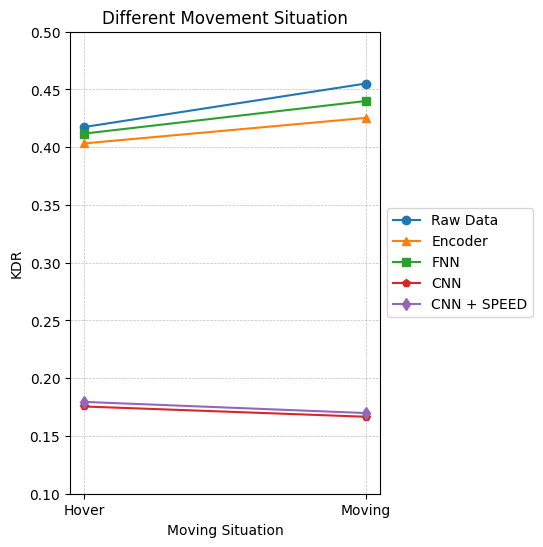

In [80]:
plt.figure(figsize=(4,6))

plt.title("Different Movement Situation")
status = ['Hover','Moving']
# raw = [raw_hover_kdr, raw_slow_kdr, raw_fast_kdr]
# encoder = [encoder_hover_kdr, encoder_slow_kdr, encoder_fast_kdr]
# fnn = [fnn_hover_kdr, fnn_slow_kdr, fnn_fast_kdr]
# cnn = [cnn_hover_kdr, cnn_slow_kdr, cnn_fast_kdr]
# rssi = [rssi_hover_kdr, rssi_slow_kdr, rssi_fast_kdr]
# speed = [cnn_speed_hover_kdr, cnn_speed_slow_kdr, cnn_speed_fast_kdr]
# speed_label = [cnn_speed_hover_label_kdr, cnn_speed_slow_label_kdr, cnn_speed_fast_label_kdr]
raw = [raw_kdr_list[0], raw_kdr_list[3]]
encoder = [encoder_kdr_list[0], encoder_kdr_list[3]]
fnn = [fnn_kdr_list[0], fnn_kdr_list[3]]
cnn = [cnn_kdr_list[0], cnn_kdr_list[3]]
speed = [cnn_speed_kdr_list[0], cnn_speed_kdr_list[3]]
# speed_label = cnn_speed_label_kdr_list[:3]
x = np.arange(len(status))
plt.plot(x, raw, label='Raw Data',marker='o')
plt.plot(x, encoder, label='Encoder',marker='^')
plt.plot(x, fnn, label='FNN',marker='s')
plt.plot(x, cnn, label='CNN',marker='p')
# plt.plot(x, rssi, label='CNN + RSSI',marker='h')
plt.plot(x, speed, label='CNN + SPEED',marker='d')
# plt.plot(x, speed_label, label='CNN + SPEED using SPEED as label',marker='x')
plt.xticks(x, status)
plt.xlabel('Moving Situation')
plt.ylim(0.1,0.5)
#let legend locate at the best position
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5,which='major')
plt.ylabel('KDR')

plt.show()

In [81]:
import greycode_quantization as quan
def kdr(uav,iot):
    uav = list(uav)
    iot = list(iot)
    count = 0
    for u,i in zip(uav,iot):
        if u != i:
            count += 1
    return count/len(uav)

trainset = np.load("test_set_4/normalized_speed_training_set.npy")
model = torch.load('cnn_speed/model_final.pth')
model.to("cpu")
model.eval()
d_s = csi_cnn_speed_dataset(trainset)
print(d_s.__len__())

kdr_yjlist = []
speed_hylist = []

for i in range(9215):
    plot_index = i
    data, iot_original = d_s.__getitem__(plot_index)
    index = torch.from_numpy(np.array([i+1 for i in range(51)]))
    uav_original = data[1:52]
    uav_modify = model(torch.unsqueeze(data,0)).detach().numpy()

    uav_modify_squeeze = np.squeeze(uav_modify)
    uav_key = quan.quantization_1(uav_modify_squeeze,2,13,0)

    iot_original_squeeze = np.squeeze(iot_original.detach().numpy())
    iot_key = quan.quantization_1(iot_original_squeeze,2,13,0)

    kdr_yjlist.append([i, kdr(uav_key,iot_key)])
    speed_hylist.append([i, -(d_s.__getitem__(plot_index)[0][0][0][51]*(7.11))+7.11])

print(kdr_yjlist)
print(speed_hylist)

speed_hylist.sort(key = lambda x:x[1])
print(speed_hylist)

# calculate the average KDR in each 0.5m/s interval
speed_interval = []
kdr_interval = []
speed = 0
kdr_sum = 0
count = 0
speed_count = []
for i in range(len(speed_hylist)):
    if speed_hylist[i][1] <= speed:
        kdr_sum += kdr_yjlist[speed_hylist[i][0]][1]
        count += 1
    else:
        speed_interval.append(speed)
        if count == 0:
            kdr_interval.append(0)
        else:
            kdr_interval.append(kdr_sum/count)
        speed = speed + 0.1
        kdr_sum = 0
        speed_count.append(count)
        count = 0

print(speed_interval)
print(kdr_interval)

kdr_list = []
for i in speed_hylist:
    kdr_list.append(kdr_yjlist[i[0]][1])




9216
[[0, 0.19607843137254902], [1, 0.23529411764705882], [2, 0.19607843137254902], [3, 0.1568627450980392], [4, 0.13725490196078433], [5, 0.1568627450980392], [6, 0.13725490196078433], [7, 0.17647058823529413], [8, 0.21568627450980393], [9, 0.2549019607843137], [10, 0.2549019607843137], [11, 0.09803921568627451], [12, 0.11764705882352941], [13, 0.13725490196078433], [14, 0.11764705882352941], [15, 0.21568627450980393], [16, 0.11764705882352941], [17, 0.09803921568627451], [18, 0.09803921568627451], [19, 0.17647058823529413], [20, 0.19607843137254902], [21, 0.21568627450980393], [22, 0.2549019607843137], [23, 0.1568627450980392], [24, 0.19607843137254902], [25, 0.17647058823529413], [26, 0.21568627450980393], [27, 0.1568627450980392], [28, 0.3137254901960784], [29, 0.19607843137254902], [30, 0.21568627450980393], [31, 0.17647058823529413], [32, 0.21568627450980393], [33, 0.19607843137254902], [34, 0.21568627450980393], [35, 0.23529411764705882], [36, 0.13725490196078433], [37, 0.156862

[0.0, 0.1, 0.2, 0.4, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1]


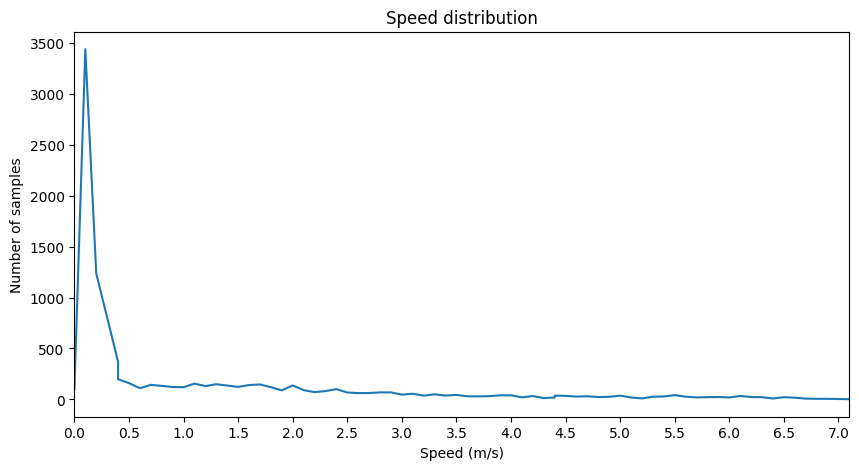

In [82]:
for i in range(len(speed_interval)):
    speed_interval[i] = math.ceil(speed_interval[i] * 10) / 10
print(speed_interval)


plt.figure(figsize=(10,5))
plt.plot(speed_interval,speed_count)
plt.xlabel('Speed (m/s)')
plt.ylabel('Number of samples')
plt.title('Speed distribution')
# let x axis show 0.5m/s interval
plt.xticks(np.arange(0, 7.1, 0.5))
# plt.yticks(np.arange(0, 201, 10))
plt.xlim(0,7.1)
# plt.ylim(0,200)


plt.show()

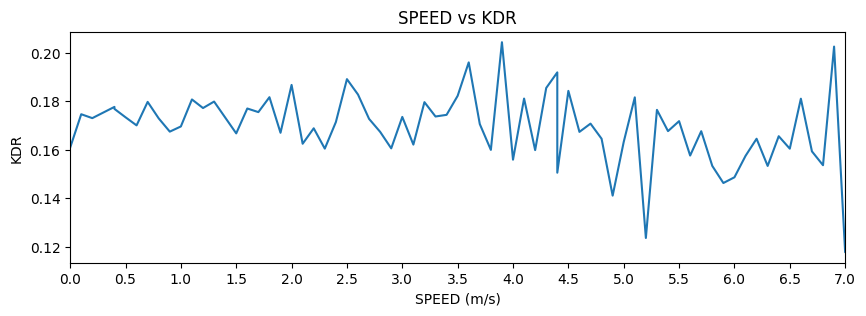

In [84]:
plt.figure(figsize=(10,3))
# plt.scatter([i[1] for i in speed_hylist],kdr_list)
plt.plot(speed_interval,kdr_interval)
plt.xlabel('SPEED (m/s)')
plt.ylabel('KDR')
plt.title('SPEED vs KDR')
plt.xlim(0,7)
plt.xticks(np.arange(0, 7.5, 0.5))
# plt.ylim(0,0.3)
plt.show()